In [ ]:
# 0. Найдите вашего любимого актера, режиссера, фильм и жанр.
# Том Кукуруз - Tom Cruise, Кристофер Нолан - Christopher Nolan,
# Парк Юрского Периода - Jurrasic Park, комедии - Comedy
# В вопросах у которых стоит значок ❤︎ нужно дополнительно использовать вашего любимого актера, фильм и т.п.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [3]:
df = pd.read_csv("tmdb-movies.csv")

In [4]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [9]:
# ❤︎ Фильм - Avengers: Age of Ultron 
# ❤︎ Актер - Chris Evans
# ❤︎ Режиссер - Ridley Scott
# ❤︎ Жанр - Action

In [ ]:
# 1. Какой фильм имеет больше всего оценок? (❤︎)

In [7]:
top_vote = df.groupby('original_title').vote_count.mean().to_frame().sort_values(ascending=False,by = ['vote_count']).head(1);
top_vote

,vote_count
original_title,
Inception,9767.0


In [9]:
df['vote_count'].values[14]

4304

In [ ]:
# 2. Какой фильм, а также какого жанра и года выпуска, имеет самые высокие оценки? (❤︎)

In [38]:
top_vote = tmdb_data.groupby('original_title').vote_average.mean().to_frame().sort_values(ascending=False,by = ['vote_average']).head(1);
top_vote

,vote_average
original_title,
The Story of Film: An Odyssey,9.2


In [10]:
df['vote_average'].values[14]

7.4

In [ ]:
# 3. Какой фильм самый короткий/длинный по продолжительности? (❤︎)

In [5]:
df['runtime'].max()

900

In [6]:
df['runtime'].min()

0

In [11]:
df['runtime'].values[14]

141

In [ ]:
# 4. Сколько всего киностудий (product_companies)?

In [10]:
def splitbysepandaddnewrows(dataframe,column_name,seperator):
    dataframe[column_name] = dataframe[column_name].str.split(seperator)
    return dataframe.explode(column_name)

In [43]:
proddata = splitbysepandaddnewrows(df.copy(),'production_companies','|').production_companies.value_counts().sort_values(ascending=False)
row_count = sum(1 for row in proddata)
row_count

7879

In [ ]:
# 5. Какое количество фильмов сняла каждая из киностудий?

In [45]:
proddata = splitbysepandaddnewrows(df.copy(),'production_companies','|').production_companies.value_counts().sort_values(ascending=False)
proddata

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Hugo Films                                  1
BBC America                                 1
Precision Films                             1
Calimari Productions                        1
Submarine Entertainment Distributors        1
Name: production_companies, Length: 7879, dtype: int64

In [ ]:
# 6. Сколько фильмов было снято одной киностудией, двумя, тремя и т.д.?

In [ ]:
# 7. Какая средняя оценка у фильмов с вашим любимым актером?

In [ ]:
# 7.1. Найдите актера, который снимался чаще всего и ответьте на вопрос в каких жанрах? (❤︎)

In [11]:
castdata = splitbysepandaddnewrows(df.copy(),'cast','|').cast.value_counts().sort_values(ascending=False)
castdata.head(1)

Robert De Niro    72
Name: cast, dtype: int64

In [ ]:
# 8. Сборы какой кинокомпании самые высокие за последние 5 лет (с 2010 по 2015)?

In [ ]:
# 9. Топ-10 режиссеров и актеров с самым высоким в среднем рейтингом фильмов?

In [12]:
director_explode_df = splitbysepandaddnewrows(df.copy(),'director','|');
top_10_directors_rating = director_explode_df.groupby('director').vote_average.mean().to_frame().sort_values(ascending=False,by = ['vote_average']).head(10);
top_10_directors_rating

,vote_average
director,
Mark Cousins,9.2
Derek Frankowski,8.8
David Mallet,8.7
Curt Morgan,8.5
James Payne,8.5
Michael Henry Wilson,8.5
Saul Swimmer,8.5
Jorge RamÃ­rez SuÃ¡rez,8.4
Anthony Mandler,8.4


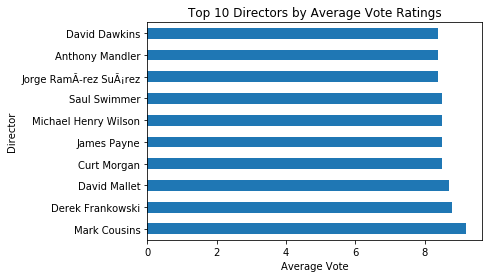

In [13]:
top_10_directors_rating.vote_average.plot(kind='barh')
plt.title("Top 10 Directors by Average Vote Ratings")
plt.xlabel("Average Vote")
plt.ylabel("Director");

In [14]:
actor_explode_df = splitbysepandaddnewrows(df.copy(),'cast','|');
top_10_actors_rating = actor_explode_df.groupby('cast').vote_average.mean().to_frame().sort_values(ascending=False,by = ['vote_average']).head(10);
top_10_actors_rating

,vote_average
cast,
Agnes de Mille,9.2
Cari Beauchamp,9.2
Jean-Michel Frodon,9.2
Mark Cousins,9.2
Oona Chaplin,8.8
Sam Brown,8.7
Jon Carin,8.7
Per Wiberg,8.6
Mikael Ã…kerfeldt,8.6


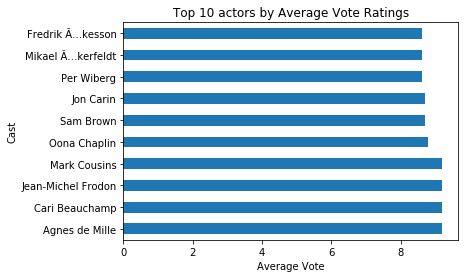

In [15]:
top_10_actors_rating.vote_average.plot(kind='barh')
plt.title("Top 10 actors by Average Vote Ratings")
plt.xlabel("Average Vote")
plt.ylabel("Cast");

In [ ]:
# 10. Фильмы в каком жанре в среднем имеют самые высокие оценки? (❤︎)

In [ ]:
# 11. Топ-10 ключевых слов (keywords)?

In [16]:
keywordsdata = splitbysepandaddnewrows(df.copy(),'keywords','|').keywords.value_counts().sort_values(ascending=False)
keywordsdata.head(10)

woman director      413
independent film    396
based on novel      278
sex                 272
sport               216
murder              204
musical             169
biography           169
new york            163
suspense            159
Name: keywords, dtype: int64

In [ ]:
# 12. Растет ли бюджет фильмов с каждым годом? (постройте график)

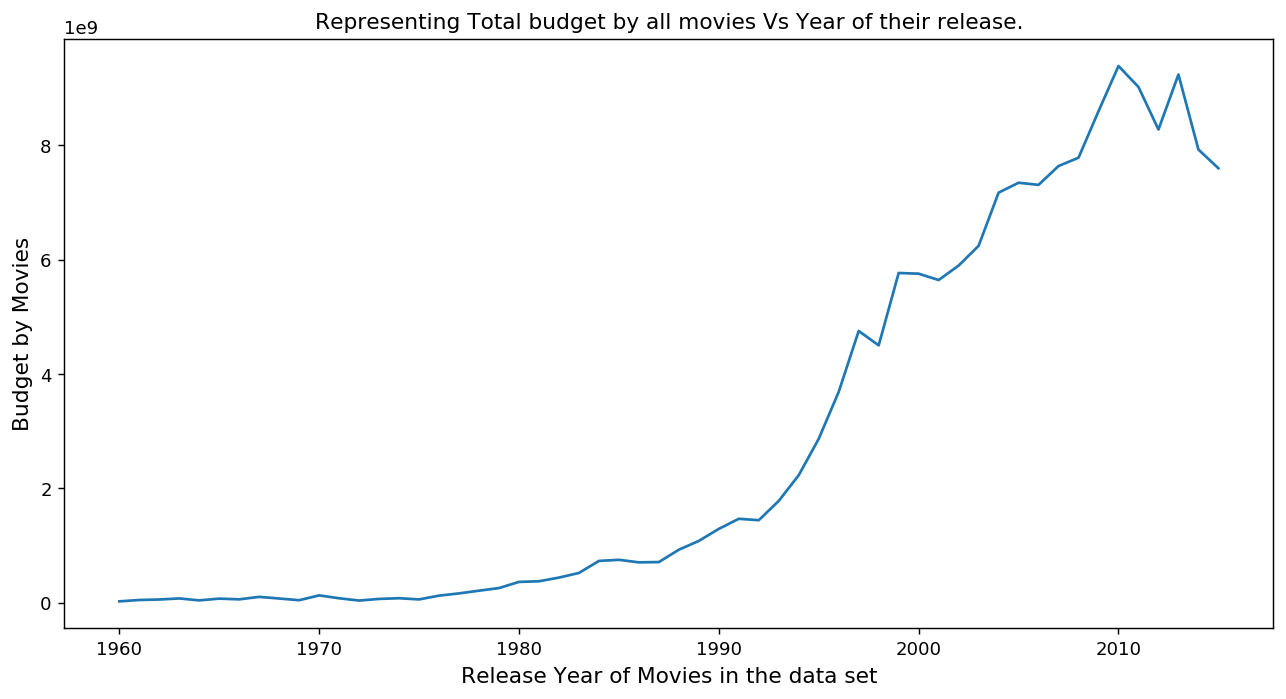

In [20]:
budget_year = df.groupby('release_year')['budget'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Budget by Movies', fontsize = 12)
plt.title('Representing Total budget by all movies Vs Year of their release.')
plt.plot(budget_year)
plt.show()

In [ ]:
# 13. Что больше всего влияет на доходы фильмов?

In [ ]:
# 14. Топ-5 самых прибильных и убыточных фильмов (по соотношению бюджета к доходам)

In [ ]:
# 15. Как изменялось количество снимаемых фильмов в жанре "Drama" с течением времени? (Постройте график) ❤︎

In [ ]:
# 16. Топ-10 актеров, которые снялись в наибольшем количестве фильмов

In [21]:
castdata = splitbysepandaddnewrows(df.copy(),'cast','|').cast.value_counts().sort_values(ascending=False)
castdata.head(10)

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
Name: cast, dtype: int64

In [ ]:
# 17. Средний рейтинг фильмов по годам (постройте график)

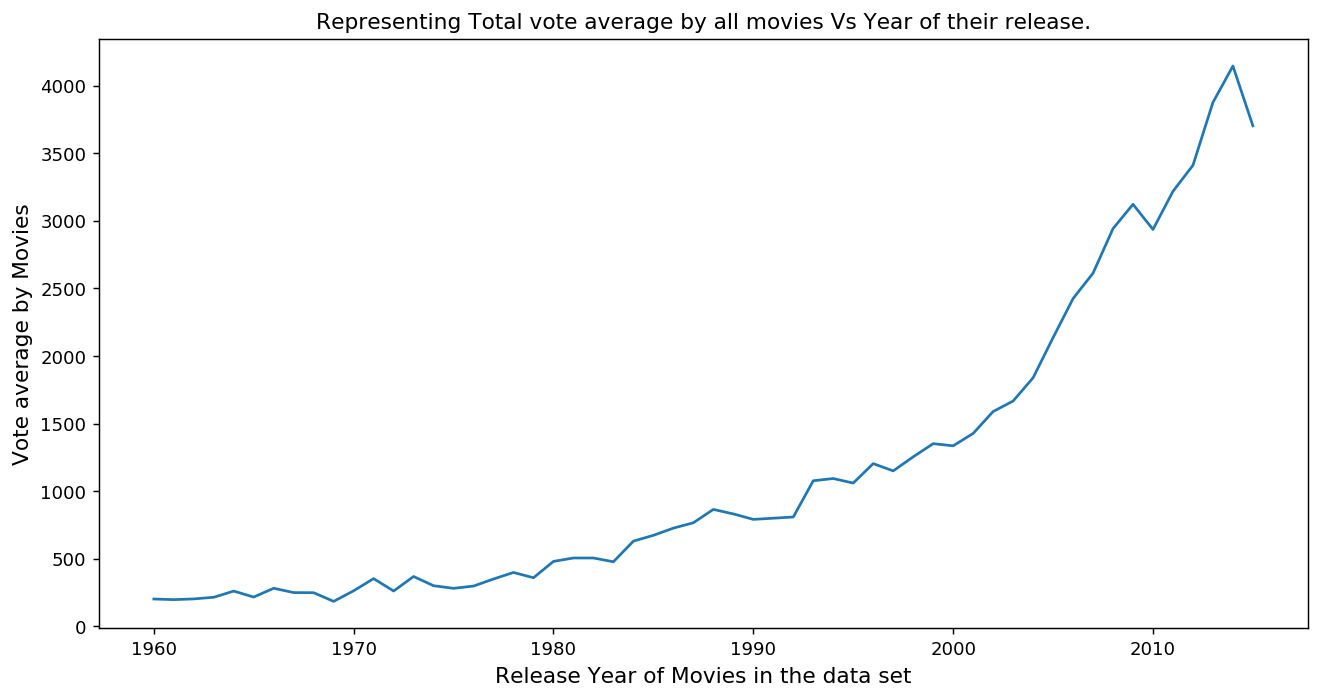

In [40]:
vote_year = df.groupby('release_year')['vote_average'].sum()
plt.figure(figsize=(12,6), dpi = 130)
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
plt.ylabel('Vote average by Movies', fontsize = 12)
plt.title('Representing Total vote average by all movies Vs Year of their release.')
plt.plot(budget_year)
plt.show()

In [ ]:
# 18. Постройте график распределения жанров (столько-то процентов это боевики, столько-то комедии и т.п.)

In [22]:
def splitbyseperator(column,seperator):
    return column.str.split(seperator,expand=True)

In [23]:
df_copy_genre = df.copy()

In [24]:
df_copy_genre['genres'] = df_copy_genre.genres.str.split('|')

In [25]:
df_genre_multiple = df_copy_genre.explode('genres')
df_genre_multiple.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [26]:
df_genre = df_genre_multiple[['popularity', 'genres','release_year']]
df_genre.head()

,popularity,genres,release_year
0,32.985763,Action,2015
0,32.985763,Adventure,2015
0,32.985763,Science Fiction,2015
0,32.985763,Thriller,2015
1,28.419936,Action,2015


In [27]:
df_genre_grouped = df_genre_multiple.groupby(['release_year','genres']).popularity.mean()
genre_yearwise = df_genre_grouped.to_frame().groupby(level = 'release_year').popularity.nlargest(1).to_frame()

In [28]:
genre_yearwise.reset_index(level=2,inplace=True)

In [29]:
genre = genre_yearwise.genres.value_counts()
genre

Adventure          14
Animation          10
Fantasy             8
Crime               5
Action              3
War                 3
Family              3
Music               2
Western             2
Mystery             2
Science Fiction     2
History             1
Thriller            1
Name: genres, dtype: int64

In [30]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

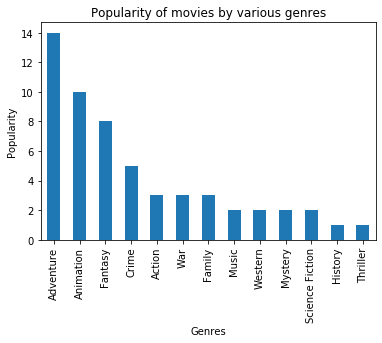

In [31]:
genre.plot.bar(title="Popularity of movies by various genres",xlabel="Genres",ylabel="Popularity");

In [ ]:
# 19. Какой режиссер чаще всего снимал одного и того же актера?

In [ ]:
# 20. Какая пара жанров чаще всего встречается вместе?

In [ ]:
# 21. Топ-10 ключевых слов с самым высоким рейтингом/бюджетом/доходами фильмов (слово - срейдний рейтинг/бюджет/доходы)

In [ ]:
# 22. Постройте и визуализируйте граф связей между актерами (как это было в работе АПИ ВК).